In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
import xgboost as xgb
color = sns.color_palette()

%matplotlib inline

In [148]:
macro_cols = ["balance_trade", "balance_trade_growth", "eurrub", "average_provision_of_build_contract",
"micex_rgbi_tr", "micex_cbi_tr", "deposits_rate", "mortgage_value", "mortgage_rate",
"income_per_cap", "rent_price_4+room_bus", "museum_visitis_per_100_cap", "apartment_build"]

In [170]:
df_train = pd.read_csv("../input/train.csv", parse_dates=['timestamp'])
df_test = pd.read_csv("../input/test.csv", parse_dates=['timestamp'])

In [174]:
df_train.shape

(30471, 292)

In [177]:
df_train[list(range(100))]

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.177975,2.158587,0.600973,1.080934,23.683460,1.804127,3.633334,5.419893,65.038716,1.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0.273345,0.550690,0.065321,0.966479,1.317476,4.655004,8.648587,3.411993,40.943917,2.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0.158072,0.374848,0.453172,0.939275,4.912660,3.381083,11.996480,1.277658,15.331896,3.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0.236455,0.078090,0.106125,0.451173,15.623710,2.017080,14.317640,4.291432,51.497190,4.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0.376838,0.258289,0.236214,0.392871,10.683540,2.936581,11.903910,0.853960,10.247521,5.0
5,6,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,...,0.113466,1.073495,1.497903,0.256487,7.186740,0.780330,14.075140,0.375312,4.503740,6.0
6,7,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,...,0.516979,2.393239,0.632445,0.707268,13.900700,1.371596,10.329880,2.603671,31.244046,7.0
7,8,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,...,0.581511,1.602056,0.165124,1.166992,23.118380,1.131798,4.042541,4.309575,51.714896,8.0
8,9,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,...,0.256589,0.939584,0.148957,0.670432,20.940970,1.759887,3.925497,1.540958,18.491502,9.0
9,10,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,...,0.150686,1.969774,0.191191,2.024971,16.753090,2.790526,16.561900,2.522422,30.269060,10.0


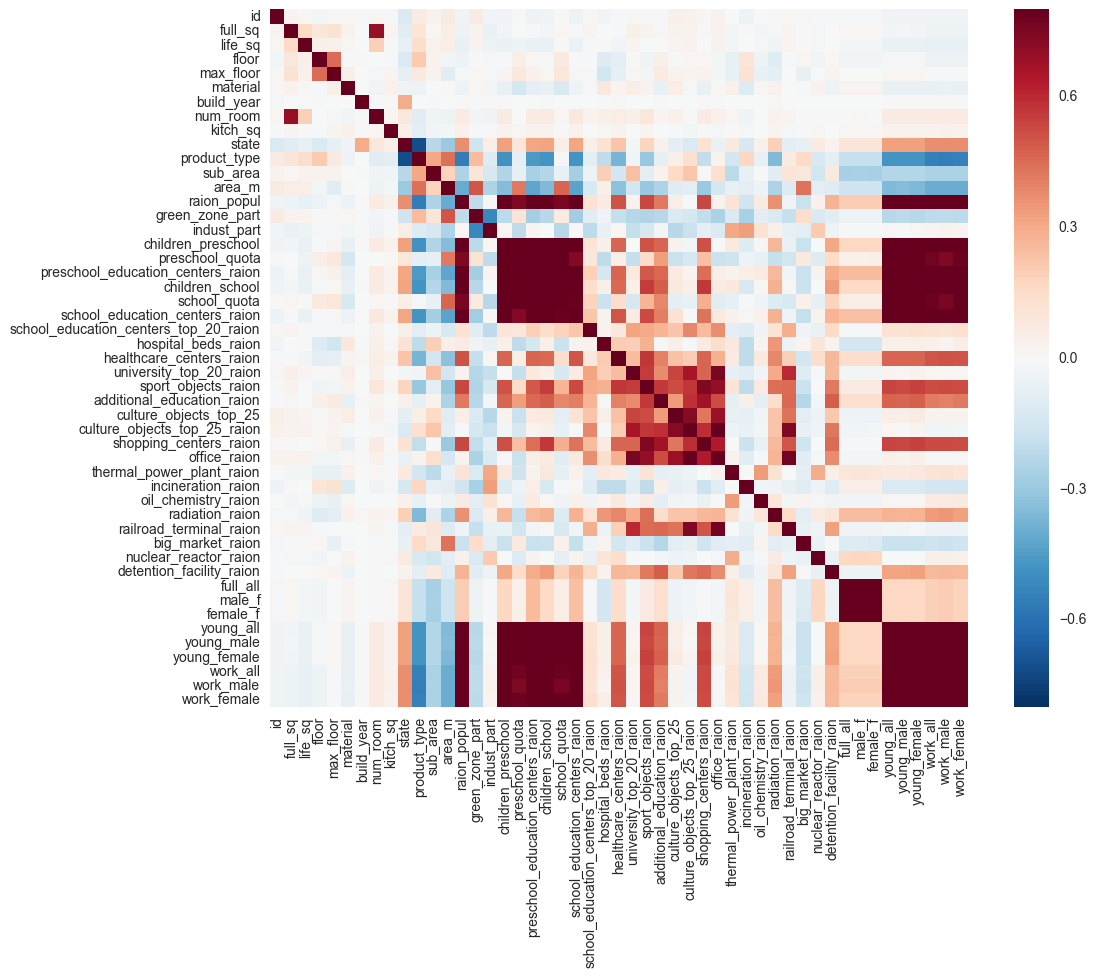

In [179]:
corrmat = df_train[list(range(50))].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


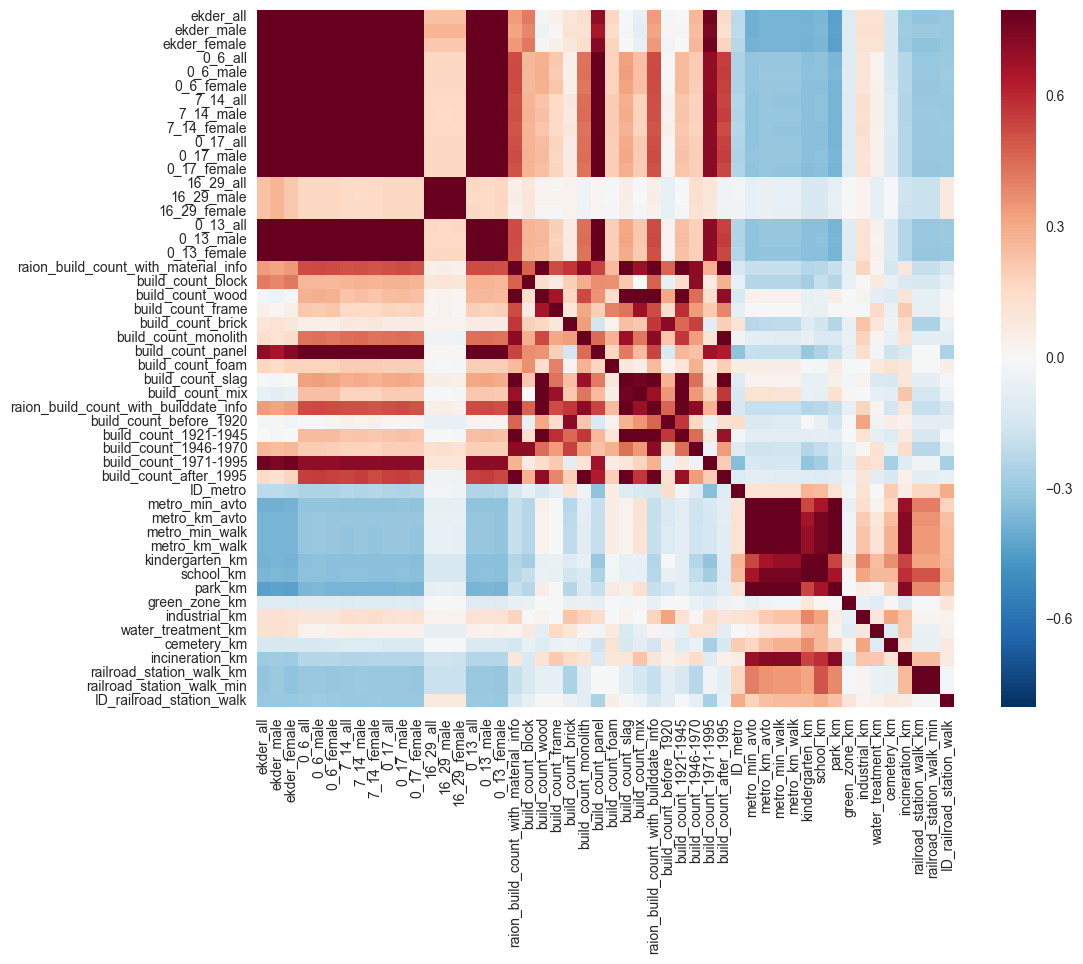

In [184]:
corrmat = df_train[list(range(50,100))].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);



In [149]:

macro_df = pd.read_csv("../input/macro.csv", parse_dates=['timestamp'], usecols=['timestamp'] + macro_cols)
train_df = pd.merge(df_train, macro_df, how='left', on='timestamp')
test_df = pd.merge(df_test, macro_df, how='left', on='timestamp')
print(train_df.shape, test_df.shape)

((30471, 305), (7662, 304))


In [28]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,158
1,datetime64[ns],1
2,float64,214
3,object,18


In [23]:
ulimit = np.percentile(train_df.price_doc.values, 99)
llimit = np.percentile(train_df.price_doc.values, 1)

In [24]:
train_df.ix[train_df['price_doc']>ulimit,'price_doc'] = ulimit
train_df.ix[train_df['price_doc']<llimit,'price_doc'] = llimit

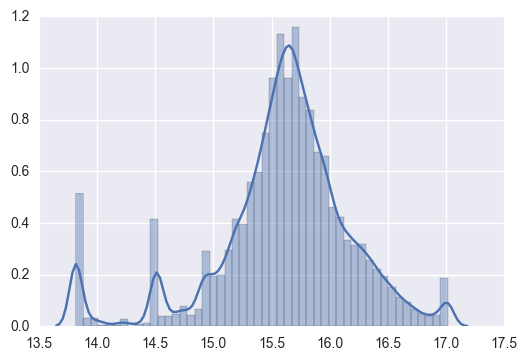

In [27]:
sns.distplot(np.log(train_df.price_doc.values), bins=50, kde=True)

In [171]:
def cati(train_df):
    for f in train_df.columns:
        if train_df[f].dtype=='object':
            print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(train_df[f].values.astype('str')) + list(test_df[f].values.astype('str')))
            train_df[f] = lbl.transform(list(train_df[f].values.astype('str')))
            test_df[f] = lbl.transform(list(test_df[f].values.astype('str')))

In [47]:
for f in train_df.columns:
    if train_df[f].isnull().sum()>0:
        print f

life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
preschool_quota
school_quota
hospital_beds_raion
raion_build_count_with_material_info
build_count_block
build_count_wood
build_count_frame
build_count_brick
build_count_monolith
build_count_panel
build_count_foam
build_count_slag
build_count_mix
raion_build_count_with_builddate_info
build_count_before_1920
build_count_1921-1945
build_count_1946-1970
build_count_1971-1995
build_count_after_1995
metro_min_walk
metro_km_walk
railroad_station_walk_km
railroad_station_walk_min
ID_railroad_station_walk
cafe_sum_500_min_price_avg
cafe_sum_500_max_price_avg
cafe_avg_price_500
cafe_sum_1000_min_price_avg
cafe_sum_1000_max_price_avg
cafe_avg_price_1000
cafe_sum_1500_min_price_avg
cafe_sum_1500_max_price_avg
cafe_avg_price_1500
cafe_sum_2000_min_price_avg
cafe_sum_2000_max_price_avg
cafe_avg_price_2000
cafe_sum_3000_min_price_avg
cafe_sum_3000_max_price_avg
cafe_avg_price_3000
prom_part_5000
cafe_sum_5000_min_price_avg
cafe_sum_5

In [48]:
train_df.fillna(-99, inplace=True)
test_df.fillna(-99, inplace=True)

In [151]:
# year and month #
train_df["yearmonth"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.month
test_df["yearmonth"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.month

# year and week #
train_df["yearweek"] = train_df["timestamp"].dt.year*100 + train_df["timestamp"].dt.weekofyear
test_df["yearweek"] = test_df["timestamp"].dt.year*100 + test_df["timestamp"].dt.weekofyear

# year #
train_df["year"] = train_df["timestamp"].dt.year
test_df["year"] = test_df["timestamp"].dt.year

# month of year #
train_df["month_of_year"] = train_df["timestamp"].dt.month
test_df["month_of_year"] = test_df["timestamp"].dt.month

# week of year #
train_df["week_of_year"] = train_df["timestamp"].dt.weekofyear
test_df["week_of_year"] = test_df["timestamp"].dt.weekofyear

# day of week #
train_df["day_of_week"] = train_df["timestamp"].dt.weekday
test_df["day_of_week"] = test_df["timestamp"].dt.weekday

In [152]:
train_df["ratio_life_sq_full_sq"] = train_df["life_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_life_sq_full_sq"] = test_df["life_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_life_sq_full_sq"].ix[train_df["ratio_life_sq_full_sq"]<0] = 0
train_df["ratio_life_sq_full_sq"].ix[train_df["ratio_life_sq_full_sq"]>1] = 1
test_df["ratio_life_sq_full_sq"].ix[test_df["ratio_life_sq_full_sq"]<0] = 0
test_df["ratio_life_sq_full_sq"].ix[test_df["ratio_life_sq_full_sq"]>1] = 1

In [153]:
train_df["ratio_kitch_sq_life_sq"] = train_df["kitch_sq"] / np.maximum(train_df["life_sq"].astype("float"),1)
test_df["ratio_kitch_sq_life_sq"] = test_df["kitch_sq"] / np.maximum(test_df["life_sq"].astype("float"),1)
train_df["ratio_kitch_sq_life_sq"].ix[train_df["ratio_kitch_sq_life_sq"]<0] = 0
train_df["ratio_kitch_sq_life_sq"].ix[train_df["ratio_kitch_sq_life_sq"]>1] = 1
test_df["ratio_kitch_sq_life_sq"].ix[test_df["ratio_kitch_sq_life_sq"]<0] = 0
test_df["ratio_kitch_sq_life_sq"].ix[test_df["ratio_kitch_sq_life_sq"]>1] = 1

In [154]:
train_df["ratio_kitch_sq_full_sq"] = train_df["kitch_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_kitch_sq_full_sq"] = test_df["kitch_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_kitch_sq_full_sq"].ix[train_df["ratio_kitch_sq_full_sq"]<0] = 0
train_df["ratio_kitch_sq_full_sq"].ix[train_df["ratio_kitch_sq_full_sq"]>1] = 1
test_df["ratio_kitch_sq_full_sq"].ix[test_df["ratio_kitch_sq_full_sq"]<0] = 0
test_df["ratio_kitch_sq_full_sq"].ix[test_df["ratio_kitch_sq_full_sq"]>1] = 1

In [155]:
train_df["ratio_floor_max_floor"] = train_df["floor"] / train_df["max_floor"].astype("float")
test_df["ratio_floor_max_floor"] = test_df["floor"] / test_df["max_floor"].astype("float")
train_df['ratio_floor_max_floor'].ix[train_df['ratio_floor_max_floor']<0] = 0
train_df['ratio_floor_max_floor'].ix[train_df['ratio_floor_max_floor']>1] = 1
test_df['ratio_floor_max_floor'].ix[test_df['ratio_floor_max_floor']<0] = 0
test_df['ratio_floor_max_floor'].ix[test_df['ratio_floor_max_floor']>1] = 1

In [54]:
train_df["age_of_building"] = train_df["build_year"] - train_df["year"]
test_df["age_of_building"] = test_df["build_year"] - test_df["year"]

In [55]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,181
1,datetime64[ns],1
2,float64,218


In [156]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,yearmonth,yearweek,year,month_of_year,week_of_year,day_of_week,ratio_life_sq_full_sq,ratio_kitch_sq_life_sq,ratio_kitch_sq_full_sq,ratio_floor_max_floor
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,201108,201133,2011,8,33,5,0.627907,NaN,NaN,NaN
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,201108,201134,2011,8,34,1,0.558824,NaN,NaN,NaN
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,201108,201134,2011,8,34,5,0.674419,NaN,NaN,NaN
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,201109,201135,2011,9,35,3,0.561798,NaN,NaN,NaN
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,201109,201136,2011,9,36,0,1.000000,NaN,NaN,NaN


In [157]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional     scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
target = 'price_doc'
IDcol = 'id'

In [59]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])

    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[taget],eval_metric='auc')

    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [158]:
import math

In [159]:
def rmsle(preds, dtrain):
    labels = dtrain.get_label()
    assert len(preds) == len(labels)
    labels = labels.tolist()
    preds = preds.tolist()
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(max(0, preds[i]) + 1)) ** 2.0 for i, pred in enumerate(labels)]
    return 'rmsle', (sum(terms_to_sum) * (1.0 / len(preds))) ** 0.5

In [160]:
predictors = [x for x in train_df.columns if x not in ['timestamp',target,IDcol]]


In [161]:
x_train = train_df[predictors].values
x_test = test_df[predictors].values
y_train = train_df['price_doc'].values
split = 25000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

In [162]:
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 800, watchlist, feval=rmsle, early_stopping_rounds=100)

p_test = clf.predict(xgb.DMatrix(x_test))

sub = pd.DataFrame()
sub['id'] = test_df['id'].values
sub['price_doc'] = p_test
sub.to_csv('xgb.csv', index=False)

[0]	train-rmse:8.16994e+06	valid-rmse:9.5296e+06	train-rmsle:3.8609	valid-rmsle:3.95775
Multiple eval metrics have been passed: 'valid-rmsle' will be used for early stopping.

Will train until valid-rmsle hasn't improved in 100 rounds.
[1]	train-rmse:8.02688e+06	valid-rmse:9.37884e+06	train-rmsle:3.18375	valid-rmsle:3.27894
[2]	train-rmse:7.88691e+06	valid-rmse:9.23123e+06	train-rmsle:2.79117	valid-rmsle:2.88826
[3]	train-rmse:7.74972e+06	valid-rmse:9.08914e+06	train-rmsle:2.518	valid-rmsle:2.61581
[4]	train-rmse:7.61522e+06	valid-rmse:8.9491e+06	train-rmsle:2.30859	valid-rmsle:2.40561
[5]	train-rmse:7.48378e+06	valid-rmse:8.81441e+06	train-rmsle:2.14027	valid-rmsle:2.23625
[6]	train-rmse:7.35532e+06	valid-rmse:8.68157e+06	train-rmsle:1.99982	valid-rmsle:2.09579
[7]	train-rmse:7.22913e+06	valid-rmse:8.54882e+06	train-rmsle:1.87973	valid-rmsle:1.97386
[8]	train-rmse:7.10605e+06	valid-rmse:8.41957e+06	train-rmsle:1.77517	valid-rmsle:1.86794
[9]	train-rmse:6.98565e+06	valid-rmse:8.29236e+

In [137]:
sub = pd.DataFrame()
sub['id'] = test_df['id'].values
sub['price_doc'] = p_test
sub.to_csv('xgb.csv', index=False)

In [163]:
fscore = clf.get_fscore()
feat_importances = []
for ft, score in fscore.iteritems():
    feat_importances.append({'Feature': ft, 'Importance': score})
feat_importances = pd.DataFrame(feat_importances)
feat_importances = feat_importances.sort_values(
    by='Importance', ascending=False).reset_index(drop=True)
# Divide the importances by the sum of all importances
# to get relative importances. By using relative importances
# the sum of all importances will equal to 1, i.e.,
# np.sum(feat_importances['importance']) == 1
feat_importances['Importance'] /= feat_importances['Importance'].sum()

In [169]:
feat_importances

,Feature,Importance
0,f0,0.127759
1,f2,0.031873
2,f1,0.028294
3,f5,0.024548
4,f3,0.020401
5,f294,0.016421
6,f291,0.015251
7,f308,0.014415
8,f293,0.014281
9,f87,0.013512


In [164]:
Flist = feat_importances[:].Feature.values

In [165]:
Findex = []
for i in Flist:
    Findex.append(int(i[1:]))

In [166]:
Findex

[0,
 2,
 1,
 5,
 3,
 294,
 291,
 308,
 293,
 87,
 8,
 311,
 115,
 289,
 7,
 90,
 83,
 145,
 303,
 10,
 101,
 91,
 89,
 88,
 310,
 307,
 138,
 134,
 124,
 130,
 146,
 110,
 113,
 84,
 136,
 297,
 103,
 22,
 137,
 95,
 11,
 6,
 197,
 141,
 143,
 93,
 296,
 149,
 135,
 298,
 140,
 82,
 129,
 306,
 13,
 271,
 226,
 85,
 309,
 128,
 295,
 126,
 132,
 142,
 267,
 125,
 299,
 174,
 14,
 290,
 158,
 144,
 16,
 148,
 106,
 122,
 99,
 98,
 244,
 180,
 266,
 133,
 123,
 131,
 127,
 94,
 105,
 227,
 4,
 147,
 12,
 151,
 280,
 175,
 92,
 139,
 272,
 117,
 71,
 159,
 9,
 119,
 223,
 121,
 107,
 264,
 250,
 269,
 200,
 248,
 181,
 152,
 201,
 203,
 157,
 273,
 300,
 154,
 176,
 224,
 70,
 282,
 281,
 202,
 249,
 198,
 257,
 179,
 225,
 243,
 302,
 221,
 246,
 190,
 108,
 241,
 97,
 67,
 292,
 111,
 114,
 25,
 256,
 19,
 72,
 287,
 218,
 66,
 258,
 204,
 305,
 232,
 220,
 245,
 205,
 185,
 178,
 29,
 81,
 270,
 276,
 288,
 228,
 188,
 260,
 165,
 27,
 30,
 234,
 186,
 208,
 177,
 196,
 79,
 231,
 161,

In [167]:
[predictors[i]for i in Findex]

['full_sq',
 'floor',
 'life_sq',
 'build_year',
 'max_floor',
 'micex_cbi_tr',
 'eurrub',
 'ratio_life_sq_full_sq',
 'micex_rgbi_tr',
 'kindergarten_km',
 'state',
 'ratio_floor_max_floor',
 'railroad_km',
 'balance_trade',
 'kitch_sq',
 'green_zone_km',
 'metro_min_avto',
 'mosque_km',
 'yearweek',
 'sub_area',
 'public_transport_station_km',
 'industrial_km',
 'park_km',
 'school_km',
 'ratio_kitch_sq_full_sq',
 'day_of_week',
 'workplaces_km',
 'hospice_morgue_km',
 'power_transmission_line_km',
 'swim_pool_km',
 'theater_km',
 'big_road1_km',
 'big_road2_km',
 'metro_km_avto',
 'public_healthcare_km',
 'mortgage_rate',
 'water_km',
 'hospital_beds_raion',
 'university_km',
 'railroad_station_walk_km',
 'area_m',
 'num_room',
 'green_part_1500',
 'additional_education_km',
 'big_church_km',
 'cemetery_km',
 'mortgage_value',
 'catering_km',
 'detention_facility_km',
 'income_per_cap',
 'office_km',
 'ID_metro',
 'fitness_km',
 'week_of_year',
 'green_zone_part',
 'trc_sqm_5000',
 '